快群：
$$
-\nabla \cdot [D_1(\vec{r})\nabla\phi_1(\vec{r})] + \Sigma_{a1}(\vec{r})\phi_1(\vec{r}) + \Sigma_{s12}(\vec{r})\phi_1(\vec{r}) = \frac{\chi_1}{k_{\text{eff}}}[\nu\Sigma_{f1}(\vec{r})\phi_1(\vec{r}) + \nu\Sigma_{f2}(\vec{r})\phi_2(\vec{r})]
$$

热群
$$
-\nabla \cdot [D_2(\vec{r})\nabla\phi_2(\vec{r})] + \Sigma_{a2}(\vec{r})\phi_2(\vec{r}) = \frac{\chi_2}{k_{\text{eff}}}[\nu\Sigma_{f1}(\vec{r})\phi_1(\vec{r}) + \nu\Sigma_{f2}(\vec{r})\phi_2(\vec{r})] + \Sigma_{s12}(\vec{r})\phi_1(\vec{r})
$$




正在构造稠密矩阵...
矩阵A1的形状: (2597, 2597)
矩阵A2的形状: (2597, 2597)
矩阵A1的行列式: 0.00e+00
迭代在第 116 次收敛，k_eff = 1.14392


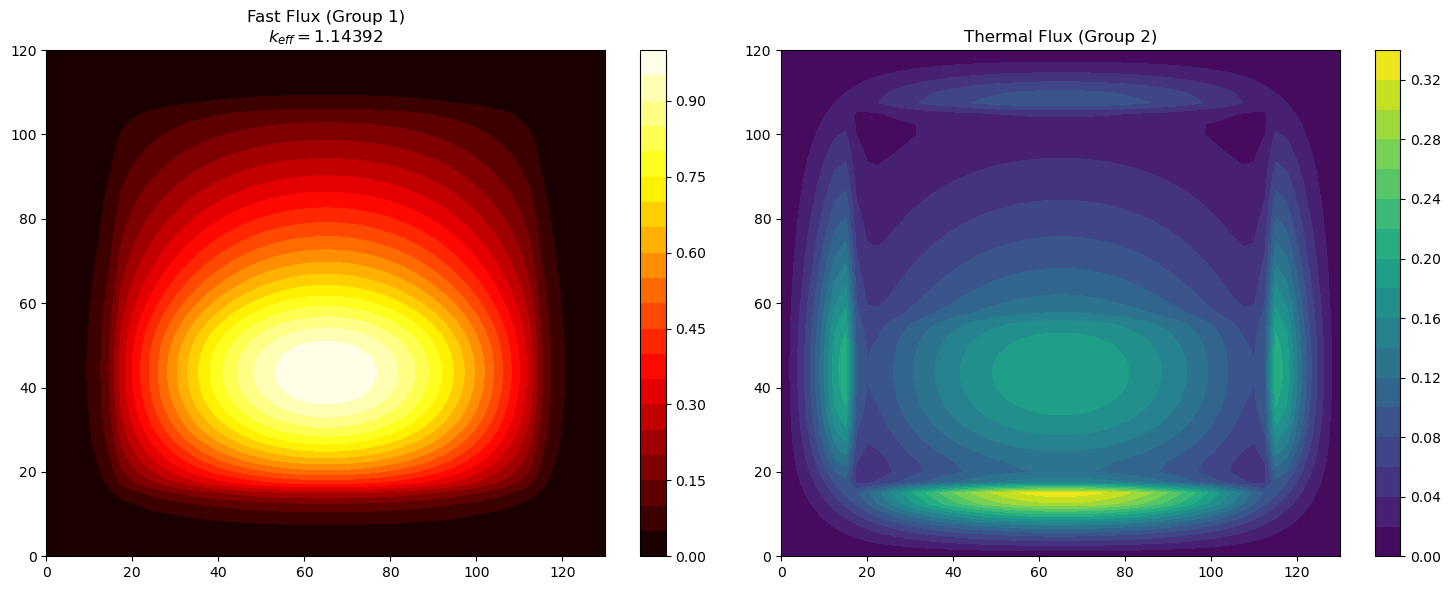

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def solve_two_dimension_two_group_numpy():
    # 初始参数设置
    dx = 2.5  
    dy = 2.5  
    X = 130.0  
    Y = 120.0 
    
    N_x = int(X/dx) + 1  
    N_y = int(Y/dy) + 1
    N = N_x * N_y 

    x = np.linspace(0, X, N_x)  
    y = np.linspace(0, Y, N_y) 

    # 三个区域群参数设置
    chi_1_ref, chi_2_ref = 0.0, 0.0
    D_1_ref, D_2_ref = 1.130, 0.166
    Sigma_a1_ref, Sigma_a2_ref = 0.0004, 0.020
    nu_Sigma_f1_ref, nu_Sigma_f2_ref = 0.0, 0.0
    Sigma_s12_ref = 0.0493
    
    chi_1_core1, chi_2_core1 = 1.0, 0.0
    D_1_core1, D_2_core1 = 1.267, 0.354
    Sigma_a1_core1, Sigma_a2_core1 = 0.0121, 0.121
    nu_Sigma_f1_core1, nu_Sigma_f2_core1 = 0.0085, 0.1851
    Sigma_s12_core1 = 0.0241
    
    chi_1_core2, chi_2_core2 = 1.0, 0.0
    D_1_core2, D_2_core2 = 1.280, 0.400
    Sigma_a1_core2, Sigma_a2_core2 = 0.010, 0.100
    nu_Sigma_f1_core2, nu_Sigma_f2_core2 = 0.006, 0.150
    Sigma_s12_core2 = 0.016
    
    chi_1 = np.zeros((N_x, N_y))  
    chi_2 = np.zeros((N_x, N_y))  
    D_1 = np.zeros((N_x, N_y))      
    D_2 = np.zeros((N_x, N_y))      
    Sigma_a1 = np.zeros((N_x, N_y)) 
    Sigma_a2 = np.zeros((N_x, N_y)) 
    nu_Sigma_f1 = np.zeros((N_x, N_y))  
    nu_Sigma_f2 = np.zeros((N_x, N_y))  
    Sigma_s12 = np.zeros((N_x, N_y))

    # 根据位置分配参数
    material_map = np.zeros((N_x, N_y))
    core_x_min, core_x_max = 15.0, 115.0  
    core1_y_min, core1_y_max = 15.0, 55.0  
    core2_y_min, core2_y_max = 55.0, 105.0  

    X_position, Y_position = np.meshgrid(x, y, indexing='ij')

    in_core_x = (X_position > core_x_min) & (X_position < core_x_max)
    in_core1_y = (Y_position > core1_y_min) & (Y_position <= core1_y_max)
    in_core2_y = (Y_position > core2_y_min) & (Y_position <= core2_y_max)

    material_map[in_core_x & in_core1_y] = 1
    material_map[in_core_x & in_core2_y] = 2

    chi_1[material_map == 0] = chi_1_ref
    chi_2[material_map == 0] = chi_2_ref
    D_1[material_map == 0] = D_1_ref
    D_2[material_map == 0] = D_2_ref
    Sigma_a1[material_map == 0] = Sigma_a1_ref
    Sigma_a2[material_map == 0] = Sigma_a2_ref
    nu_Sigma_f1[material_map == 0] = nu_Sigma_f1_ref
    nu_Sigma_f2[material_map == 0] = nu_Sigma_f2_ref
    Sigma_s12[material_map == 0] = Sigma_s12_ref

    chi_1[material_map == 1] = chi_1_core1
    chi_2[material_map == 1] = chi_2_core1
    D_1[material_map == 1] = D_1_core1
    D_2[material_map == 1] = D_2_core1
    Sigma_a1[material_map == 1] = Sigma_a1_core1
    Sigma_a2[material_map == 1] = Sigma_a2_core1
    nu_Sigma_f1[material_map == 1] = nu_Sigma_f1_core1
    nu_Sigma_f2[material_map == 1] = nu_Sigma_f2_core1
    Sigma_s12[material_map == 1] = Sigma_s12_core1

    chi_1[material_map == 2] = chi_1_core2
    chi_2[material_map == 2] = chi_2_core2
    D_1[material_map == 2] = D_1_core2
    D_2[material_map == 2] = D_2_core2
    Sigma_a1[material_map == 2] = Sigma_a1_core2
    Sigma_a2[material_map == 2] = Sigma_a2_core2
    nu_Sigma_f1[material_map == 2] = nu_Sigma_f1_core2
    nu_Sigma_f2[material_map == 2] = nu_Sigma_f2_core2
    Sigma_s12[material_map == 2] = Sigma_s12_core2 

    # 初始迭代参数设置
    phi_1_old = np.ones(N)  
    phi_2_old = np.ones(N)  

    for j in range(N_y):
        for i in range(N_x):
            if i == 0 or i == N_x-1 or j == 0 or j == N_y-1:
                idx = j * N_x + i
                phi_1_old[idx] = 0.0
                phi_2_old[idx] = 0.0

    k_eff_old = 1.0

    k_eff_history = []
    phi_1_history = []
    phi_2_history = []


    # 构造矩阵
    def build_dense_matrix(g):
        A = np.zeros((N, N))
    # F顺序展平参数数组!
        if g == 1:
            D_flat = D_1.flatten(order='F')
            Sigma_a_flat = Sigma_a1.flatten(order='F')
            Sigma_s_flat = Sigma_s12.flatten(order='F')
        elif g == 2:
            D_flat = D_2.flatten(order='F')
            Sigma_a_flat = Sigma_a2.flatten(order='F')
            Sigma_s_flat = np.zeros(N)
    
        dx2_inv = 1.0 / (dx * dx)
        dy2_inv = 1.0 / (dy * dy)
    
        for j in range(N_y):
            for i in range(N_x):
                idx = j * N_x + i  # 列（y方向）
        
        # 边界节点：真空边界条件
                if (i == 0) or (i == N_x-1) or (j == 0) or (j == N_y-1):
                    A[idx, idx] = 1.0
                    continue
        
        # 内部节点
                D = D_flat[idx]
                Sigma_a = Sigma_a_flat[idx]
                Sigma_s = Sigma_s_flat[idx]
        
        # 正确的对角项系数
                A[idx, idx] = 2 * D * (dx2_inv + dy2_inv) + Sigma_a + Sigma_s
        
        # 邻居项（带负号）
        # 左邻居 (i-1, j)
                if i > 0:
                    left_idx = j * N_x + (i-1)
                    A[idx, left_idx] = -D * dx2_inv
        
            # 右邻居 (i+1, j)
                if i < N_x - 1:
                    right_idx = j * N_x + (i+1)
                    A[idx, right_idx] = -D * dx2_inv
        
        # 下邻居 (i, j-1)
                if j > 0:
                    down_idx = (j-1) * N_x + i
                    A[idx, down_idx] = -D * dy2_inv
        
        # 上邻居 (i, j+1)
                if j < N_y - 1:
                    up_idx = (j+1) * N_x + i
                    A[idx, up_idx] = -D * dy2_inv
    
        return A


    print("\n正在构造稠密矩阵...")
    A1 = build_dense_matrix(1)
    A2 = build_dense_matrix(2)

    print(f"矩阵A1的形状: {A1.shape}")
    print(f"矩阵A2的形状: {A2.shape}")

    try:
        det_A1 = np.linalg.det(A1)
        print(f"矩阵A1的行列式: {det_A1:.2e}")
    except:
        print("矩阵A1太大，无法计算行列式")
    
        print("\n开始幂法迭代...")

        
    max_iteration = 1000
    epsilon = 1e-5

    for i in range(max_iteration):
        Q_1 = chi_1.flatten(order='F') * (nu_Sigma_f1.flatten(order='F') * phi_1_old + nu_Sigma_f2.flatten(order='F') * phi_2_old)/k_eff_old
        Q_2 = chi_2.flatten(order='F') * (nu_Sigma_f1.flatten(order='F') * phi_1_old +nu_Sigma_f2.flatten(order='F') * phi_2_old)/k_eff_old + Sigma_s12.flatten(order='F') * phi_1_old

        phi_1_new = np.linalg.solve(A1, Q_1)
        phi_2_new = np.linalg.solve(A2, Q_2) 

        k_eff_new = k_eff_old * (np.sum(nu_Sigma_f1.flatten(order='F') * phi_1_new) + np.sum(nu_Sigma_f2.flatten(order='F') * phi_2_new)) /(np.sum(nu_Sigma_f1.flatten(order='F') * phi_1_old) + np.sum(nu_Sigma_f2.flatten(order='F') * phi_2_old))
        
        # 通量归一化
        norm_factor = np.max(phi_1_new)
        phi_1_new /= norm_factor
        phi_2_new /= norm_factor

        k_eff_history.append(k_eff_new)
        phi_1_history.append(phi_1_new)
        phi_2_history.append(phi_2_new)

        phi_1_diff = np.max(np.abs(phi_1_new - phi_1_old))
        phi_2_diff = np.max(np.abs(phi_2_new - phi_2_old)) 
        k_eff_diff = abs(k_eff_new - k_eff_old)

        if phi_1_diff < epsilon and phi_2_diff < epsilon and k_eff_diff < epsilon:
            print(f"迭代在第 {i+1} 次收敛，k_eff = {k_eff_new:.5f}")
            break
        phi_1_old = phi_1_new
        phi_2_old = phi_2_new
        k_eff_old = k_eff_new
    else:
        print("未在最大迭代次数内收敛")
    
    # 画图

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # 重新整理成二维数组用于绘图
    phi_1_2d = phi_1_new.reshape((N_x, N_y), order='F')
    phi_2_2d = phi_2_new.reshape((N_x, N_y), order='F')
    
    im1 = axes[0].contourf(x, y, phi_1_2d.T, levels=20, cmap='hot')
    axes[0].set_title(f"Fast Flux (Group 1)\n$k_{{eff}}={k_eff_new:.5f}$")
    plt.colorbar(im1, ax=axes[0])
    
    im2 = axes[1].contourf(x, y, phi_2_2d.T, levels=20, cmap='viridis')
    axes[1].set_title("Thermal Flux (Group 2)")
    plt.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()
 
    return phi_1_new, phi_2_new, k_eff_new

if __name__ == "__main__":
    solve_two_dimension_two_group_numpy()
        